In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('liquid_data.csv')
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Liquid Fund,5.592720e+11,1.632829e+09,342.5173,342.5173,342.5173,12/30/2022
1,Liquid Fund,5.585260e+11,1.631110e+09,342.4204,342.4204,342.4204,12/29/2022
2,Liquid Fund,5.576420e+11,1.628991e+09,342.3238,342.3238,342.3238,12/28/2022
3,Liquid Fund,5.546570e+11,1.620728e+09,342.2268,342.2268,342.2268,12/27/2022
4,Liquid Fund,5.514460e+11,1.613174e+09,341.8391,341.8391,341.8391,12/23/2022


In [3]:
data.shape

(1660, 7)

In [4]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Liquid Fund,5.592720e+11,1.632829e+09,342.5173,342.5173,342.5173,12/30/2022
1,Liquid Fund,5.585260e+11,1.631110e+09,342.4204,342.4204,342.4204,12/29/2022
2,Liquid Fund,5.576420e+11,1.628991e+09,342.3238,342.3238,342.3238,12/28/2022
3,Liquid Fund,5.546570e+11,1.620728e+09,342.2268,342.2268,342.2268,12/27/2022
4,Liquid Fund,5.514460e+11,1.613174e+09,341.8391,341.8391,341.8391,12/23/2022


In [5]:
data['Net Asset Value'] = np.sqrt(data['Net Asset Value'])
data['Outstanding Number of Units'] = np.sqrt(data['Outstanding Number of Units'])

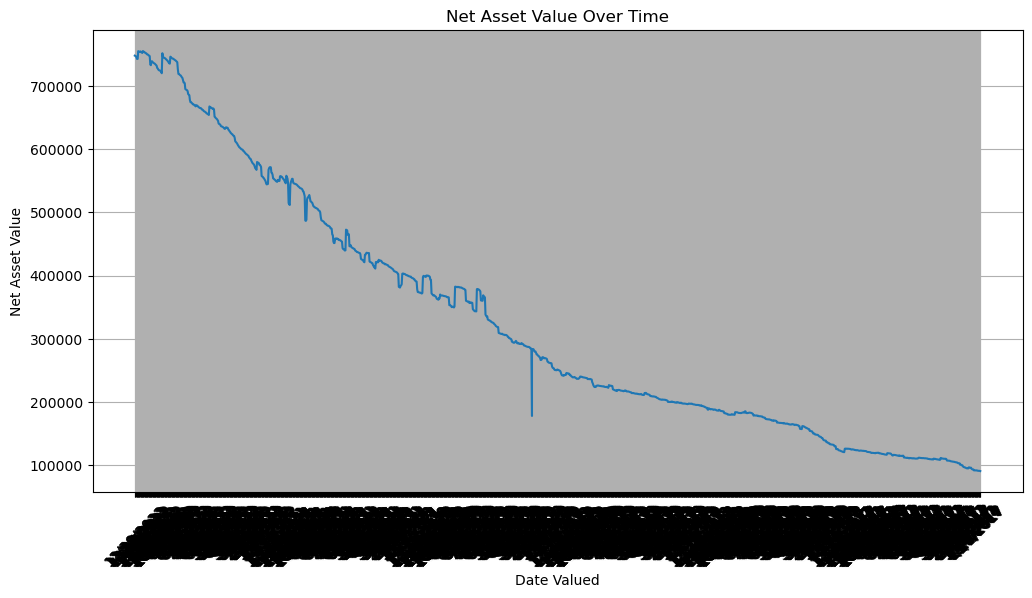

In [6]:
# Time series plot of NAV
plt.figure(figsize=(12, 6))
plt.plot(data['Date Valued'], data['Net Asset Value'])
plt.xlabel('Date Valued')
plt.ylabel('Net Asset Value')
plt.title('Net Asset Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [7]:
data.set_index('Date Valued', inplace=True)

In [8]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit
Date Valued,,,,,,
12/30/2022,Liquid Fund,747844.903707,40408.273918,342.5173,342.5173,342.5173
12/29/2022,Liquid Fund,747345.970753,40387.008035,342.4204,342.4204,342.4204
12/28/2022,Liquid Fund,746754.310332,40360.762530,342.3238,342.3238,342.3238
12/27/2022,Liquid Fund,744752.979182,40258.269796,342.2268,342.2268,342.2268
12/23/2022,Liquid Fund,742594.101781,40164.332573,341.8391,341.8391,341.8391


In [9]:
df=data.filter(['Net Asset Value'])
dataset=df.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1328

In [10]:
df.head()

,Net Asset Value
Date Valued,
12/30/2022,747844.903707
12/29/2022,747345.970753
12/28/2022,746754.310332
12/27/2022,744752.979182
12/23/2022,742594.101781


In [11]:
## scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[9.89126068e-01],
       [9.88374563e-01],
       [9.87483390e-01],
       ...,
       [6.41316108e-04],
       [5.29009784e-04],
       [0.00000000e+00]])

In [12]:
#create the training set
#create the scaled training set
train_data=scaled_data[0:training_data_len, :]
print(train_data[:5])

[[0.98912607]
 [0.98837456]
 [0.98748339]
 [0.98446894]
 [0.98121718]]


In [13]:
#split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)

[array([0.98912607, 0.98837456, 0.98748339, 0.98446894, 0.98121718,
       0.98148793, 0.99985636, 0.99879249, 0.99827816, 0.99878051,
       0.99911195, 0.99745474, 0.99665974, 0.99552377, 1.        ,
       0.99937046, 0.99749873, 0.99741076, 0.99603935, 0.99520429,
       0.99476048, 0.99246149, 0.99208591, 0.99139065, 0.98988915,
       0.98920059, 0.98793209, 0.96792363, 0.96640357, 0.97529909,
       0.97567831, 0.97386875, 0.9724887 , 0.971551  , 0.97036983,
       0.96971319, 0.96837001, 0.96675399, 0.96530433, 0.95999735,
       0.95844352, 0.95591669, 0.95461264, 0.95378226, 0.95362942,
       0.95252875, 0.95029381, 0.94722306, 0.99483964, 0.98676207,
       0.9850088 , 0.98426667, 0.98366979, 0.98257939, 0.98095144,
       0.97985839, 0.97821427, 0.97707579, 0.97492689, 0.97245497])]
[0.97088994364185]


In [14]:
#convert the x_train and y_train into numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [15]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1268, 60, 1)

In [16]:
#buld LSTM model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#complite the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1268/1268 [==============================] - 49s 34ms/step - loss: 0.0014
Epoch 2/2
1268/1268 [==============================] - 50s 40ms/step - loss: 6.0903e-04


In [19]:
# #create the testing dataset
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [20]:
#convert the data to numpy array
x_test=np.array(x_test)

In [21]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(332, 60, 1)

In [22]:
#get the model prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

11/11 [==============================] - 2s 22ms/step


array([[123440.836],
       [123326.25 ],
       [123215.44 ],
       [123114.336],
       [123020.22 ],
       [122936.64 ],
       [122861.4  ],
       [122796.26 ],
       [122729.26 ],
       [122665.5  ],
       [122551.016],
       [122413.   ],
       [122265.61 ],
       [122122.92 ],
       [122003.18 ],
       [121905.77 ],
       [121825.49 ],
       [121760.914],
       [121709.98 ],
       [121670.62 ],
       [121631.914],
       [121596.02 ],
       [121555.46 ],
       [121514.7  ],
       [121455.27 ],
       [121388.375],
       [121362.664],
       [121364.26 ],
       [121377.875],
       [121397.56 ],
       [121418.65 ],
       [121438.97 ],
       [121468.38 ],
       [121501.34 ],
       [121532.69 ],
       [121560.79 ],
       [121589.984],
       [121617.88 ],
       [121583.51 ],
       [121513.016],
       [121431.164],
       [121348.47 ],
       [121267.875],
       [121194.21 ],
       [121106.07 ],
       [121014.93 ],
       [120907.68 ],
       [12079

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 9523340.549132729
R-squared (R2): 0.8082142431961542
Mean Absolute Error (MAE): 2809.5147945716103
Root Mean Squared Error (RMSE): 3085.9910157245645


In [41]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\roma\AppData\Local\Temp\ipykernel_8516\3983594056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


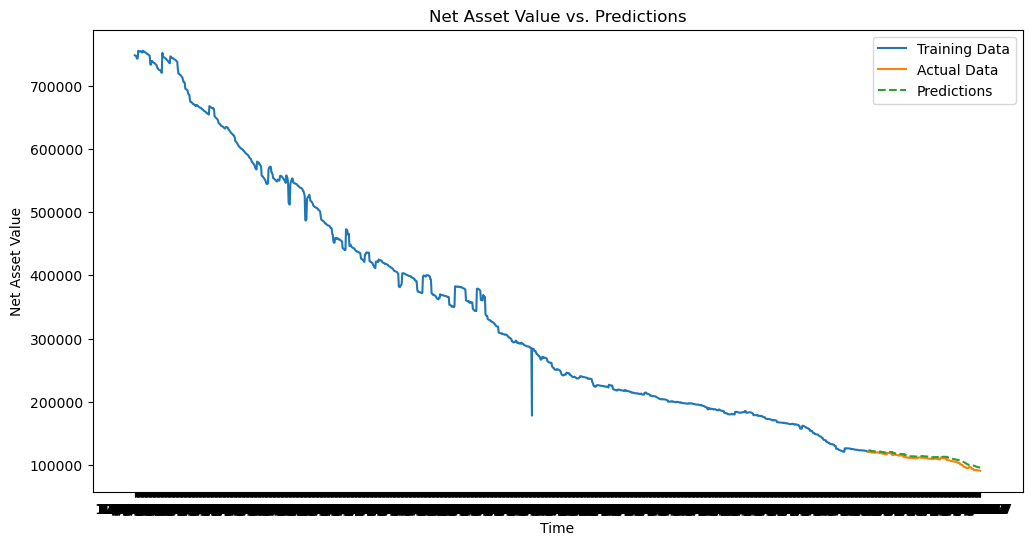

In [42]:
plt.figure(figsize=(12, 6))
plt.title('Net Asset Value vs. Predictions')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')
plt.plot(train['Net Asset Value'], label='Training Data')
plt.plot(valid['Net Asset Value'], label='Actual Data')
plt.plot(valid['Predictions'], label='Predictions', linestyle='--')
plt.legend()
plt.show()

In [43]:
train

,Net Asset Value
Date Valued,
12/30/2022,747844.903707
12/29/2022,747345.970753
12/28/2022,746754.310332
12/27/2022,744752.979182
12/23/2022,742594.101781
...,...
10/23/2017,121481.762870
10/23/2017,121481.762870
10/20/2017,121459.517091


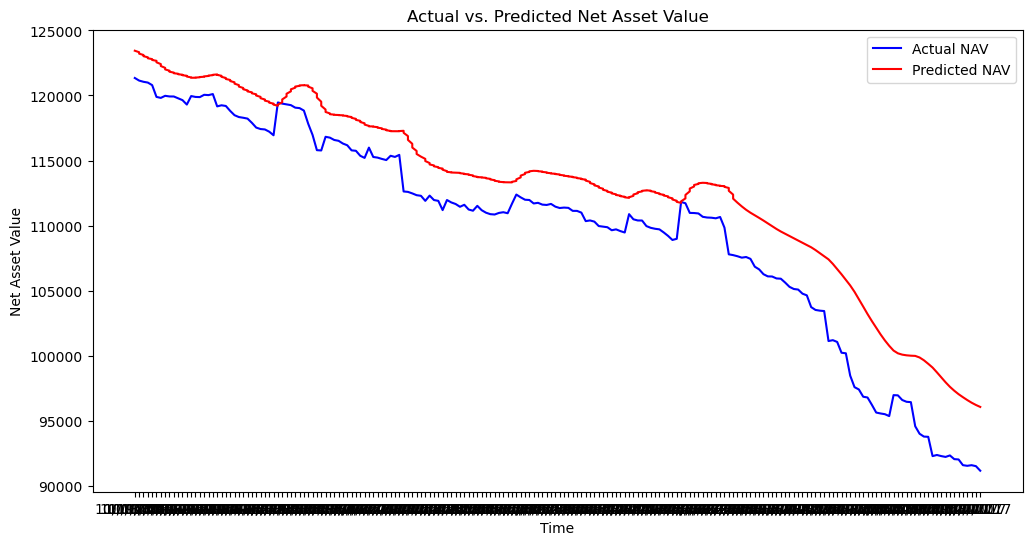

In [44]:
import matplotlib.pyplot as plt

# Assuming 'valid' is a DataFrame containing 'Net Asset Value' and 'Predictions' columns
plt.figure(figsize=(12, 6))
plt.title('Actual vs. Predicted Net Asset Value')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')

# Plot the actual 'Net Asset Value' in blue
plt.plot(valid['Net Asset Value'], label='Actual NAV', color='blue')

# Plot the 'Predictions' in red
plt.plot(valid['Predictions'], label='Predicted NAV', color='red')

plt.legend()
plt.show()


In [45]:
valid

,Net Asset Value,Predictions
Date Valued,,
10/19/2017,121345.132185,123440.835938
10/18/2017,121145.267130,123326.250000
10/18/2017,121145.267130,123215.437500
10/17/2017,121052.482911,123114.335938
10/17/2017,121052.482911,123020.218750
...,...,...
1/6/2017,91580.066739,96806.132812
1/5/2017,91530.088009,96585.796875
1/4/2017,91578.187086,96383.039062


In [46]:
from sklearn.ensemble import RandomForestRegressor
features = ['Outstanding Number of Units', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']
target = 'Net Asset Value'

X = data[features]
y = data[target]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(X)


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions using the Random Forest model
rf_predictions = rf_model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, rf_predictions, squared=False)

# Calculate MSE
mse = mean_squared_error(y, rf_predictions)

# Calculate R-squared (R2)
r2 = r2_score(y, rf_predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 399.84756234656726
Mean Squared Error (MSE): 159878.07311449197
R-squared (R2): 0.9999957261900013


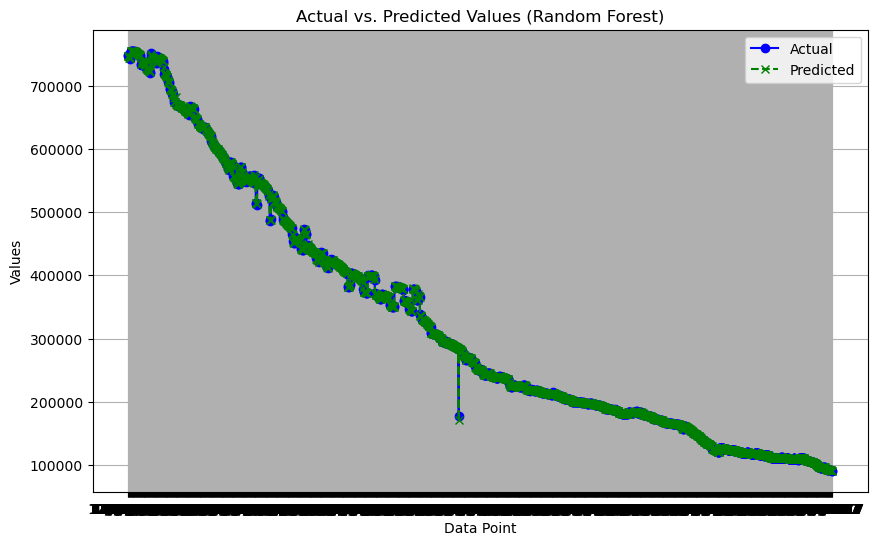

In [50]:

rf_predictions = rf_model.predict(X)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': rf_predictions})

# Plot actual and predicted values on the same axis
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x', linestyle='--', color='green')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()
